# Pretrained models

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
input_path = '../data/generator/class 0/squirrel.jpeg'

In [3]:
img = image.load_img(input_path, target_size=(224, 224))

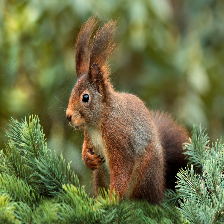

In [4]:
img

In [5]:
img_array = image.img_to_array(img)

In [6]:
img_array.shape

(224, 224, 3)

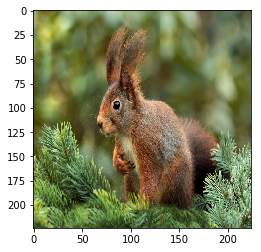

In [7]:
plt.imshow(img_array.astype('uint8'))

In [8]:
img_tensor = np.expand_dims(img_array, axis=0)

In [9]:
img_tensor.shape

(1, 224, 224, 3)

## Predict class with pre-trained resnet50

In [10]:
from keras.applications.resnet50 import preprocess_input as ppr50

In [11]:
img_ppr50 = np.copy(img_tensor)
img_ppr50 = ppr50(img_ppr50)

In [12]:
img_ppr50[0].shape

(224, 224, 3)

In [13]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import decode_predictions as dpr50

model = ResNet50(weights='imagenet')

102858752/102853048 [==============================] - 32s 0us/step


In [14]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [15]:
preds = model.predict(img_ppr50)

In [16]:
preds.shape

(1, 1000)

In [17]:
dpr50(preds, top=3)[0]

40960/35363 [==================================] - 0s 1us/step


[('n02356798', 'fox_squirrel', 0.6352937),
 ('n02326432', 'hare', 0.13932453),
 ('n02325366', 'wood_rabbit', 0.058619704)]

## Exercise 1:

Use a different pre-trained model from the ones provided at:

https://keras.io/applications/

to predict the same image. Do the predictions match?

In [18]:
# print all classes ImageNet can recognize
dpr50(preds, top=1000)[0]

[('n02356798', 'fox_squirrel', 0.6352937),
 ('n02326432', 'hare', 0.13932453),
 ('n02325366', 'wood_rabbit', 0.058619704),
 ('n02480495', 'orangutan', 0.054801922),
 ('n01877812', 'wallaby', 0.0370633),
 ('n02361337', 'marmot', 0.026368981),
 ('n02493509', 'titi', 0.0058976617),
 ('n02277742', 'ringlet', 0.0048178546),
 ('n02493793', 'spider_monkey', 0.0031638008),
 ('n13133613', 'ear', 0.00303361),
 ('n02442845', 'mink', 0.0016427967),
 ('n02137549', 'mongoose', 0.0015329294),
 ('n02328150', 'Angora', 0.0015051339),
 ('n12144580', 'corn', 0.0011410785),
 ('n02454379', 'armadillo', 0.0011104726),
 ('n02119789', 'kit_fox', 0.0009704404),
 ('n02480855', 'gorilla', 0.00093057094),
 ('n01775062', 'wolf_spider', 0.0008684776),
 ('n02483708', 'siamang', 0.0008096059),
 ('n02500267', 'indri', 0.00079990446),
 ('n02492660', 'howler_monkey', 0.00077305536),
 ('n02486261', 'patas', 0.0007556781),
 ('n02115913', 'dhole', 0.0006738261),
 ('n02363005', 'beaver', 0.00061371725),
 ('n02481823', 'chim

In [20]:
from keras.applications.inception_v3 import preprocess_input as pprI3

In [21]:
img_pprI3 = np.copy(img_tensor)
img_pprI3 = pprI3(img_pprI3)

In [22]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import decode_predictions as dprI3

model = InceptionV3(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

96116736/96112376 [==============================] - 96s 1us/step


In [23]:
preds = model.predict(img_pprI3)

In [24]:
dprI3(preds, top=3)[0]

[('n02326432', 'hare', 0.9941444),
 ('n02356798', 'fox_squirrel', 0.0056925155),
 ('n02325366', 'wood_rabbit', 4.1556235e-05)]

## Exercise 2:

Retry this code on a different image.

- Download an image from the web
- Upload the image through the jupyter home page
- change the `input_path` path variable above to point to your new image
- re-run the notebook to see if the pre-trained model can guess your image